# ***Import the Libraries and dependencies***

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# ***Data Collection and Pre-Processing***

In [128]:
#loading the data from csv files to pandas Dataframe
Mall_data = pd.read_csv('/content/train.csv')

In [129]:
# Print the first 5 rows of dataframe
Mall_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [130]:
# Number of Data Points and Number of Features
Mall_data.shape

(8523, 12)

In [131]:
Mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type

















In [132]:
# Check for Missing Values
Mall_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


# ***Handling Missing values***

In [133]:
# Mean of 'Item_weight' column
Mall_data['Item_Weight'].mean()

12.857645184135976

In [134]:
# Filling the missing valueswith "Mean"
Mall_data['Item_Weight'].fillna(Mall_data['Item_Weight'].mean(), inplace = True)

In [135]:
# Mode of 'Outlet_Size' column
Mall_data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [136]:
# Filling the missing values in "Outlet_Size" column with "Mode"
mode_of_Outlet_Size = Mall_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))

In [137]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [138]:
miss_values = Mall_data['Outlet_Size'].isnull()
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [139]:
Mall_data.loc[miss_values, 'Outlet_Size'] = Mall_data.loc[miss_values, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size[x])

In [140]:
# Check the missing values
Mall_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# ***Data Analysis***

In [141]:
Mall_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [142]:
print(Mall_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Numrical Features

In [143]:
sns.set()

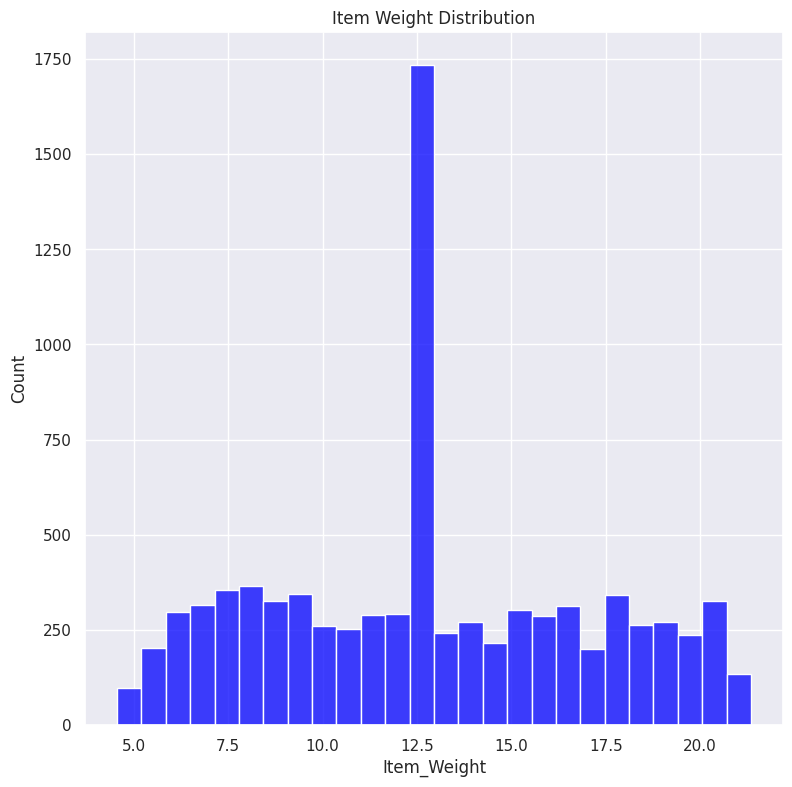

In [144]:
# item_Weight Distribution
plt.figure(figsize = (9,9))
sns.histplot(Mall_data['Item_Weight'], color='blue')
plt.title('Item Weight Distribution')
plt.show()

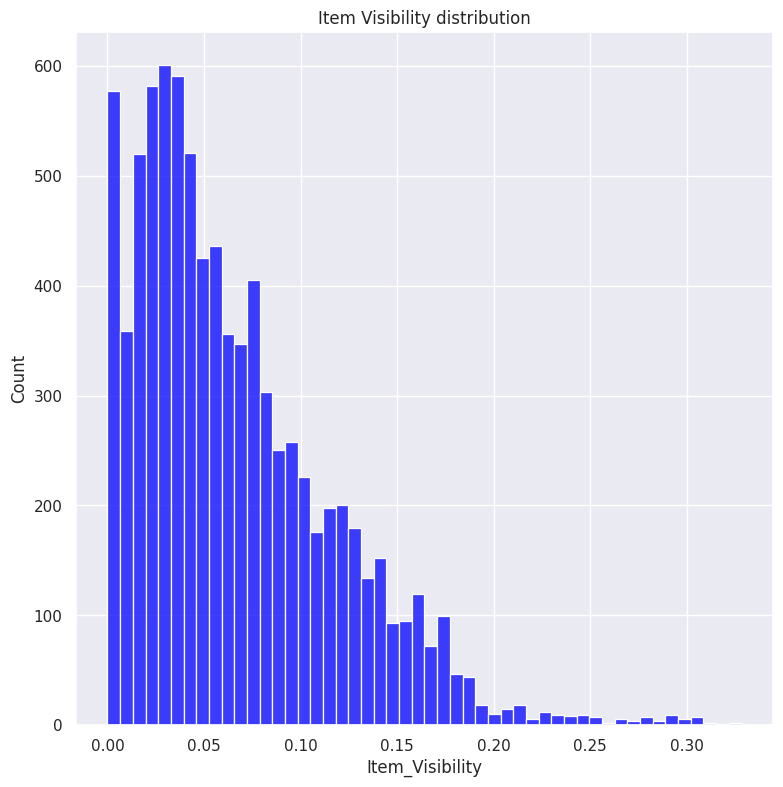

In [145]:
# Item Visibility Distribution
plt.figure(figsize = (9,9))
sns.histplot(Mall_data['Item_Visibility'], color='blue')
plt.title('Item Visibility distribution')
plt.show()

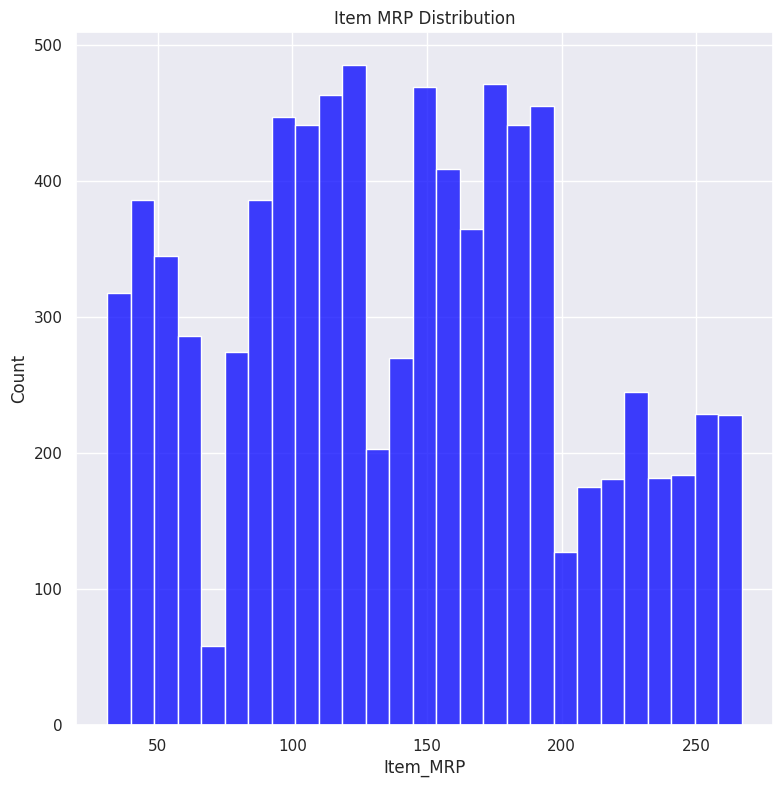

In [146]:
# Item MRP Distribution
plt.figure(figsize = (9,9))
sns.histplot(Mall_data['Item_MRP'], color='blue')
plt.title('Item MRP Distribution')
plt.show()

<ipython-input-147-e31ad5c25427>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Mall_data['Item_Outlet_Sales'], color='blue')


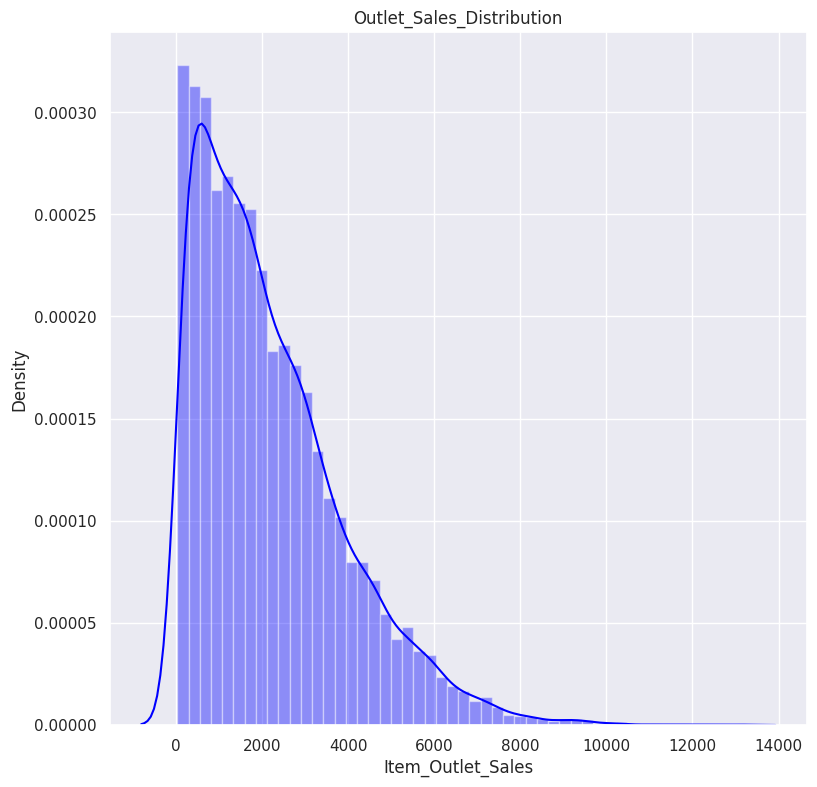

In [147]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(9,9))
sns.distplot(Mall_data['Item_Outlet_Sales'], color='blue')
plt.title('Outlet_Sales_Distribution')
plt.show()

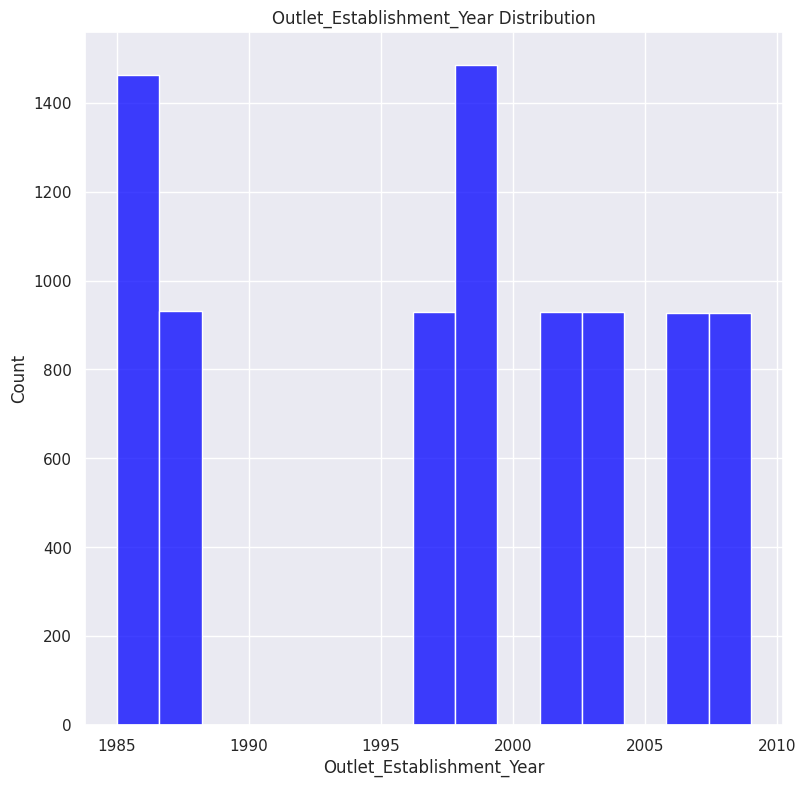

In [148]:
# Outlet_Establishment_Year Distribution
plt.figure(figsize = (9,9))
sns.histplot(Mall_data['Outlet_Establishment_Year'], color='blue')
plt.title('Outlet_Establishment_Year Distribution')
plt.show()

Categorical features

<ipython-input-149-1d0eac2f8386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Item_Fat_Content', data = Mall_data, palette = 'Set1')


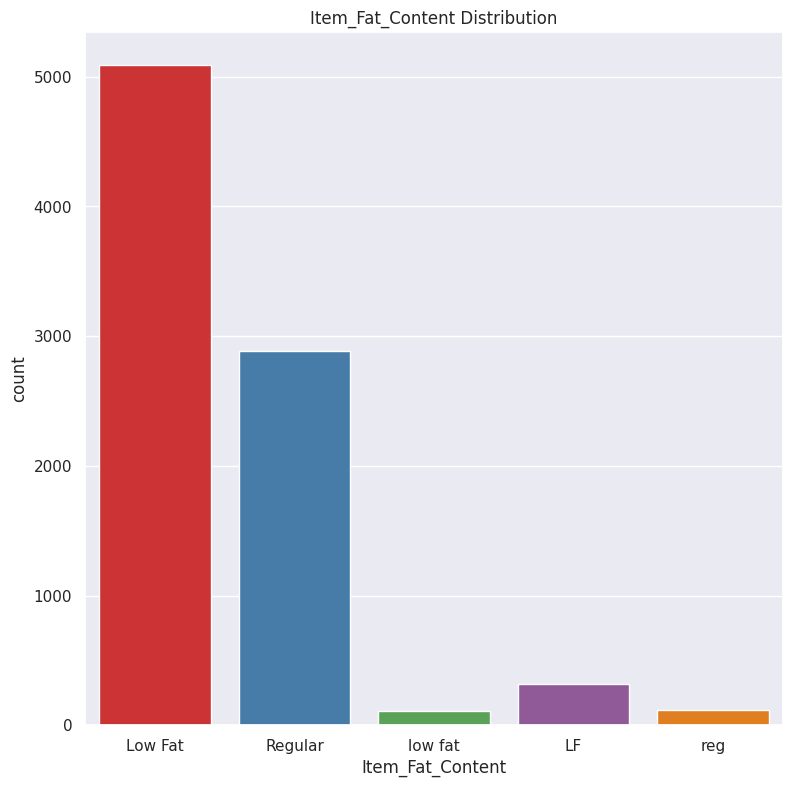

In [149]:
# Item_Fat_Content column
plt.figure(figsize = (9,9))
sns.countplot(x = 'Item_Fat_Content', data = Mall_data, palette = 'Set1')
plt.title('Item_Fat_Content Distribution')
plt.show()

<ipython-input-150-7f1419e29154>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Item_Type', data = Mall_data, palette = 'Set1')


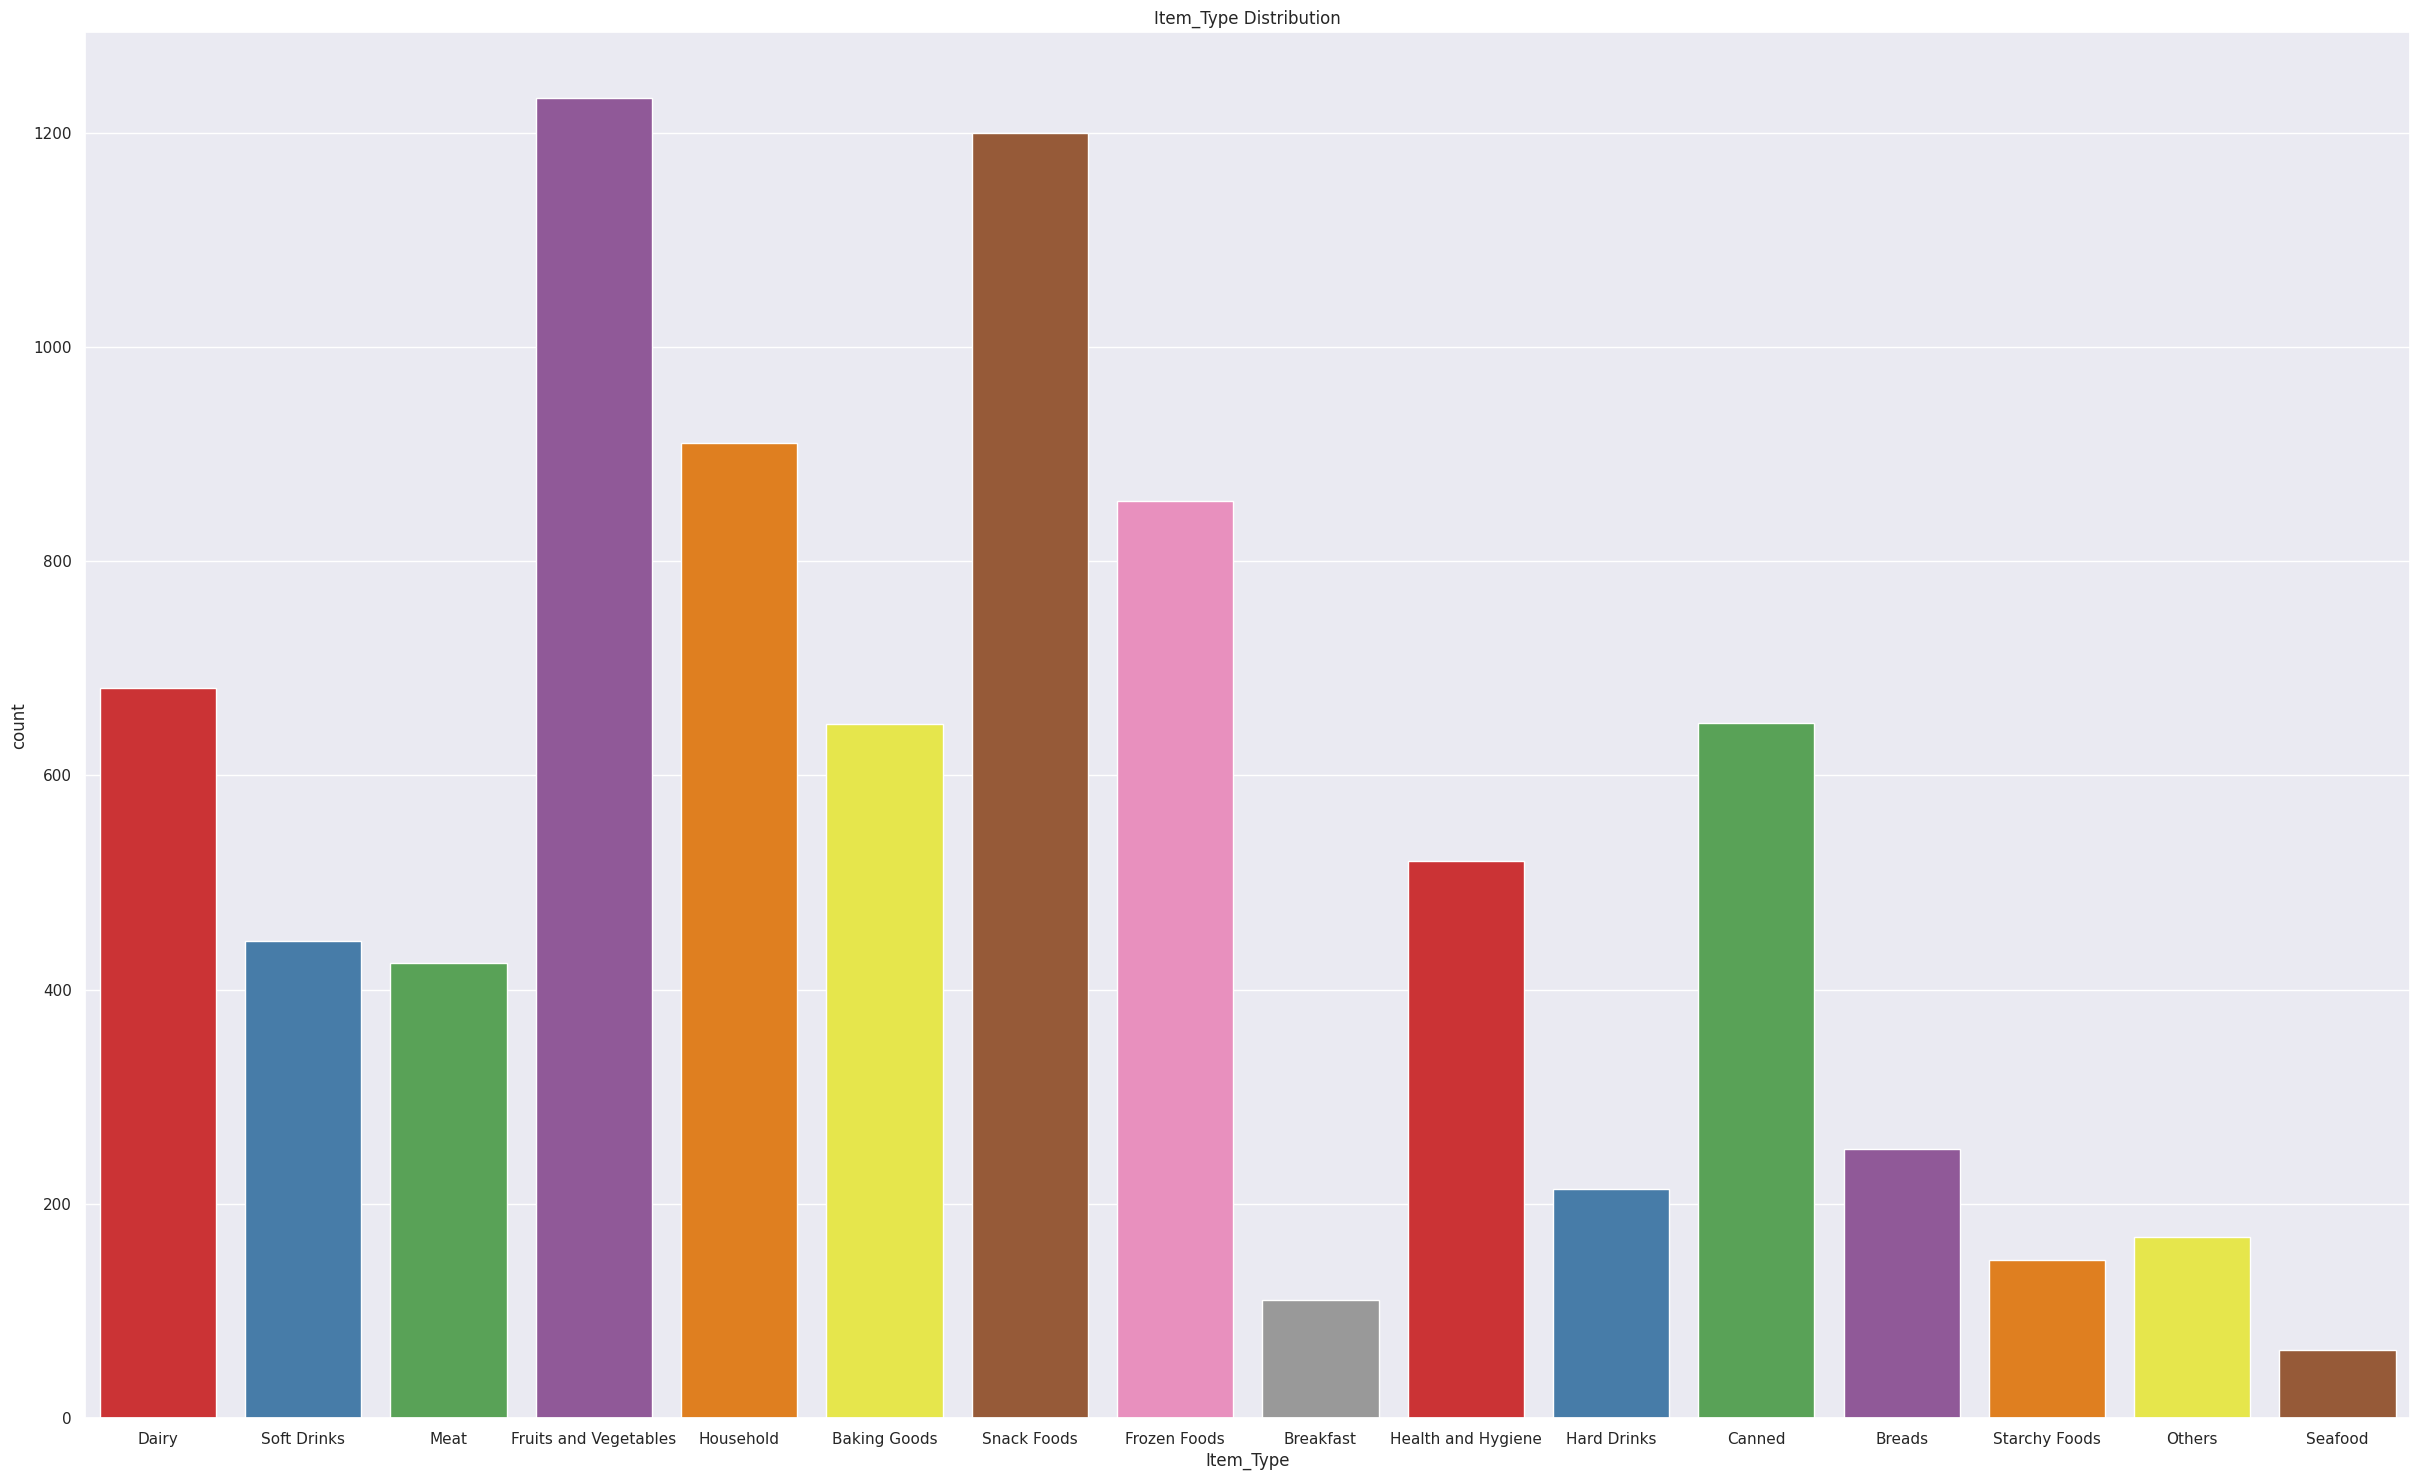

In [150]:
# Item_Type column
plt.figure(figsize = (30,18))
sns.countplot(x = 'Item_Type', data = Mall_data, palette = 'Set1')
plt.title('Item_Type Distribution')
plt.show()

<ipython-input-151-1a9541b9cc2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Outlet_Size', data = Mall_data, palette = 'Set1')


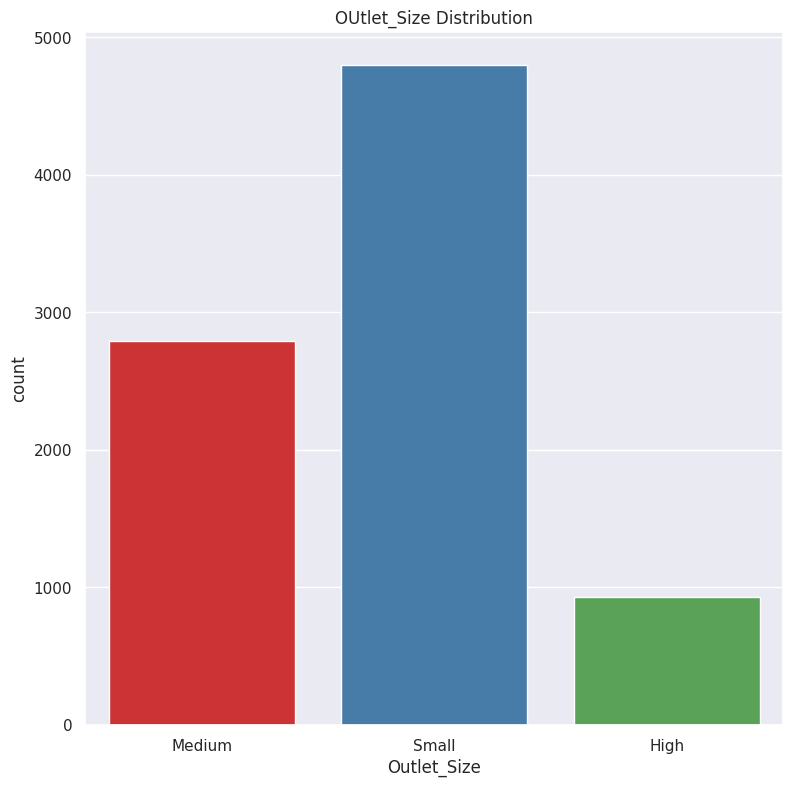

In [151]:
# Outlet_Size column
plt.figure(figsize = (9,9))
sns.countplot(x = 'Outlet_Size', data = Mall_data, palette = 'Set1')
plt.title('OUtlet_Size Distribution')
plt.show()

# ***Data Pre-Processing***

In [152]:
Mall_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [153]:
Mall_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [154]:
Mall_data.replace({'Item_Fat_Content' : {'low fat' : 'Low fat', 'LF' : 'Low Fat', 'rteg' : 'Regular'}}, inplace = True)


In [155]:
Mall_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5405
Regular,2889
reg,117
Low fat,112


# ***Label Encoding***

In [156]:
encoder = LabelEncoder()

In [157]:
Mall_data['Item_Identifier'] = encoder.fit_transform(Mall_data['Item_Identifier'])
Mall_data['Item_Fat_Content'] = encoder.fit_transform(Mall_data['Item_Fat_Content'])
Mall_data['Item_Type'] = encoder.fit_transform(Mall_data['Item_Type'])
Mall_data['Outlet_Identifier'] = encoder.fit_transform(Mall_data['Outlet_Identifier'])
Mall_data['Outlet_Size'] = encoder.fit_transform(Mall_data['Outlet_Size'])
Mall_data['Outlet_Location_Type'] = encoder.fit_transform(Mall_data['Outlet_Location_Type'])
Mall_data['Outlet_Type'] = encoder.fit_transform(Mall_data['Outlet_Type'])

In [158]:
Mall_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


***Splitting Features and Targets***

In [159]:
X = Mall_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = Mall_data['Item_Outlet_Sales']

In [160]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 2         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [161]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


***Splitting the Data into Training and Testing Data***

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [163]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# ***Model Training(XGBoost Regressor)***

In [164]:
regressor = XGBRegressor()

In [165]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# ***Model Evaluation***

In [166]:
# Prdeiction on Training data
training_data_prediction = regressor.predict(X_train)

In [167]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [168]:
print('The R Squared value of trainig data is  : ', r2_train)

The R Squared value of trainig data is  :  0.8782349638651535


In [169]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [170]:
# R Squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [171]:
print('The R Squared value of test data is: ', r2_test)

The R Squared value of test data is:  0.5099499076565385
